In [1]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
import numpy as np
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = [s[0] for s in dataset]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

/Users/Nurgetson/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Nurgetson/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [3]:
### form windowed data matrix ###
def window_data(series,window_size):
    # containers for input/output pairs
    X = []
    y = []
    
    # window data
    count = 0
    for t in range(len(series) - window_size - 1):
        # get input sequence
        temp_in = series[t:t + window_size]
        X.append(temp_in)
        
        # get corresponding target
        temp_target = series[t + window_size]
        y.append(temp_target)
        count+=1
        
    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),)
    
    return X,y

In [4]:
# split training and testing sets


In [5]:
# window data
window_size = 3
X,y = window_data(series = dataset,window_size = window_size)

In [6]:
train_test_split = int(np.ceil(2*len(y)/float(3)))
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]
X_test = X[train_test_split-1:,:]
y_test = y[train_test_split-1:]
split_pt = train_test_split + window_size 

In [7]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [8]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=window_size, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, nb_epoch=200, batch_size=2, verbose=0)

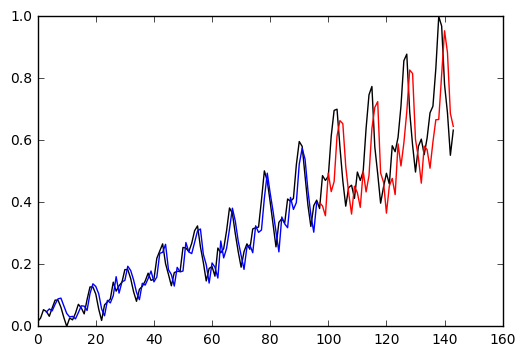

In [9]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# plot original series
plt.plot(dataset,color = 'k')

# plot training set prediction
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt+ len(test_predict),1),test_predict,color = 'r')
plt.show()

In [12]:
# Estimate model performance
# trainScore = model.evaluate(trainX, trainY, verbose=0)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
# testScore = model.evaluate(testX, testY, verbose=0)
# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))